In [30]:
import time

In [31]:
def getFile(filename):
    f = open(filename, 'r')    
    line = f.readline()
    arrays = []
    while line:
        arrays.append([int(i) for i in line[1:-2].split(',')])  #CONVERT A STRING TO INTEGER
        line = f.readline()   #READ ELEMENT LINE BY LINE
    f.close()
    return arrays

In [32]:
def saveFile(filename, arrays):
    file1 = open(filename,"w") 
    for arr in arrays:
        line = str(arr)+'\n'
        file1.writelines(line) 
    file1.close() #to change file access modes

In [33]:
import random

def generate_array(length):
    generated_array = []
    for i in range(0,length):
        generated_array.append(random.randint(0,length))
    return generated_array

In [34]:
#creating a array of size 5,10 15..... 1000
length_array = []
i=0
input_size_number = int(input("enter the input size: "))
while i<=input_size_number:
    i+=5
    length_array.append(i)
#     print(length_array)
    

random_arrays = []
asc_arrays = []
des_arrays = []
for i in length_array:
    random_arrays.append(generate_array(i))   #STORE RANDOM NUMBER
    asc_arrays.append(sorted(generate_array(i)))    #STORE NUMBER IN ASCENDING ORDER
    des_arrays.append(sorted(generate_array(i), reverse=True))        #STORE NUMBER IN DESCENDING ORDER
    
saveFile('ascending_file.txt', asc_arrays)
saveFile('descending_file.txt', des_arrays)
saveFile('rand_file.txt', random_arrays)

enter the input size: 200


# QUICK SORT FUNCTION

In [35]:
def quicksort(A,low,high):
    if low < high:
        p = partition(A,low,high)
        quicksort(A,low,p-1)
        quicksort(A,p+1,high)

In [36]:
def partition(A,low,high):
    pivot = A[high]
    i = low - 1
    for j in range(low,high):
        if (A[j] <= pivot):
            i = i+1
            A[i],A[j] = A[j],A[i]
            
    A[i+1],A[high] = A[high],A[i+1]
    return i+1

# MERGE SORT FUNCTION

In [37]:
def merge_sort(genearted_list):
    length_generated_list = len(genearted_list)
    
    if(length_generated_list <= 1):
        return genearted_list
    
    else:
        left_child = genearted_list[0:length_generated_list//2]
        right_child = genearted_list[length_generated_list//2:length_generated_list]
        
        merge_sort(left_child)
        merge_sort(right_child)
        
        return merge(left_child,right_child,genearted_list) 

In [38]:
def merge(left_child,right_child,genearted_list):
    i = j = k = 0
    
#     merge_list = [0 for _ in range(len(left_child)+len(right_child))]
    while i<len(left_child) and j<len(right_child):
        
        if left_child[i] > right_child[j]:
            genearted_list[k] = right_child[j]
            j = j+1
        
        else:
            genearted_list[k] = left_child[i]
            i = i+1
        k = k+1
        
        
        
    while i<len(left_child):
        genearted_list[k] = left_child[i]
        i = i+1
        k = k+1
        
    while j<len(right_child):
        genearted_list[k] = right_child[j]
        j = j+1
        k = k+1
        
    return genearted_list

# INSERTION SORT FUNCTION

In [39]:
def insertion_sort(generated_list):
    len_generated_list = len(generated_list)
#     print("the length of the generated list : ",len_generated_list)
    
    for current_index in range(1,len_generated_list):
        current_element = generated_list[current_index]
        previous_index = current_index - 1
        
        while previous_index >= 0 and current_element < generated_list[previous_index]:
            generated_list[previous_index+1] = generated_list[previous_index]
            generated_list[previous_index] = current_element
            previous_index = previous_index - 1
        
        
    return generated_list

# HEAP SORT FUNCTION

In [40]:
def heapify(genearted_list,i,genearted_list_length):
    left = 2*i+1
    right = (2*i)+2            #index start at 0
    max = i
    
    if(left< genearted_list_length) and (genearted_list[left]>genearted_list[i]):
        max = left
    else:
        max = i
        
    if(right<genearted_list_length) and (genearted_list[right]>genearted_list[max]):
        max = right
        
    if(max != i):
        genearted_list[i],genearted_list[max] = genearted_list[max],genearted_list[i] 
        
        genearted_list = heapify(genearted_list,genearted_list_length,max)
    return genearted_list

In [41]:
def buildheap(genearted_list):
    genearted_list_length = len(genearted_list)
    
    for i in range(genearted_list_length,-1,-1):
        genearted_list = heapify(genearted_list,i,genearted_list_length)
    return genearted_list

In [42]:
def heap_sort(genearted_list):
    genearted_list_length = len(genearted_list)
    buildheap(genearted_list)
    
    for i in range(genearted_list_length-1,0,-1):
        genearted_list[i],genearted_list[0] = genearted_list[0],genearted_list[i]
        heapify(genearted_list,i, 0) 
        
    return(genearted_list)

# BUBBLE SORT FUNCTION 

In [43]:
def bubble_sort(generated_list):
    length_generated_list = len(generated_list)
    
    for i in range(length_generated_list):        # n-1  pass 
        for j in range(length_generated_list-i-1):         #to not compare last element
            if(generated_list[j]>generated_list[j+1]):
                generated_list[j],generated_list[j+1]=generated_list[j+1],generated_list[j]
    return generated_list

# MAIN FUNCTION

In [44]:
if __name__ == '__main__':
    
    #### ---------------- QUICK SORT ---------------------
    
    quick_des_lists = getFile('descending_file.txt')
    quick_asc_lists = getFile('ascending_file.txt')
    quick_random_lists = getFile('rand_file.txt')
    
    
    total_asc_quick_time = []
    total_des_quick_time = []
    total_ran_quick_time = []
    
    sorted_des_quick_list = []
    sorted_asc_quick_list = []
    sorted_ran_quick_list = []
    
    for genearted_list in quick_des_lists:
        
        quick_desc_start_time = time.time()
        sorted_des_quick_list.append(quicksort(genearted_list,0,len(genearted_list)-1))
        quick_desc_end_time = time.time()
        
        quick_des_run_time = quick_desc_end_time-quick_desc_start_time
        
        total_des_quick_time.append(quick_des_run_time)
                                     
    for genearted_list in quick_asc_lists:
        
        quick_asc_start_time = time.time()
        sorted_asc_quick_list.append(quicksort(genearted_list,0,len(genearted_list)-1))
        quick_asc_end_time = time.time()
        
        quick_asc_run_time = quick_asc_end_time-quick_asc_start_time
        
        total_asc_quick_time.append(quick_asc_run_time)
                                     
    for genearted_list in quick_random_lists:
        
        quick_ran_start_time = time.time()
        sorted_ran_quick_list.append(quicksort(genearted_list,0,len(genearted_list)-1))
        quick_ran_end_time = time.time()
        
        quick_ran_run_time = quick_ran_end_time-quick_ran_start_time
        
        total_ran_quick_time.append(quick_ran_run_time)
                                     
    print("creating a quick_sort file which sorted the descending order number: \n")    
    saveFile('merge_descending_file.txt',sorted_des_quick_list)
    print("creating a quick_sort file which sorted the ascending order number: \n") 
    saveFile('merge_ascending_file.txt',sorted_asc_quick_list)
    print("creating a quick_sort file which sorted the random number: \n") 
    saveFile('merge_random_file.txt',sorted_ran_quick_list)
    
    
    # --------------------- QUICK SORT ENDS -------------------------------------
    
    # ###------------------------ MERGE SORT BEGINS ----------------------------
    
    
    merge_des_lists = getFile('descending_file.txt')
    merge_asc_lists = getFile('ascending_file.txt')
    merge_random_lists = getFile('rand_file.txt')
    
    total_asc_merge_time = []
    total_des_merge_time = []
    total_ran_merge_time = []
    
    sorted_des_merge_list = []
    sorted_asc_merge_list = []
    sorted_ran_merge_list = []
     
    
    for genearted_list in merge_des_lists:
        
        merge_desc_start_time = time.time()
        sorted_des_merge_list.append(merge_sort(genearted_list))
        merge_desc_end_time = time.time()
        
        merge_des_run_time = merge_desc_end_time-merge_desc_start_time
        
        total_des_merge_time.append(merge_des_run_time)
        
    for genearted_list in merge_asc_lists:
        
        merge_asc_start_time = time.time()
        sorted_asc_merge_list.append(merge_sort(genearted_list))
        merge_asc_end_time = time.time()
        
        merge_asc_run_time = merge_asc_end_time-merge_asc_start_time
        
        total_asc_merge_time.append(merge_asc_run_time)
        
        
    for genearted_list in merge_random_lists:
        
        merge_ran_start_time = time.time()
        sorted_ran_merge_list.append(merge_sort(genearted_list))
        merge_ran_end_time = time.time()
        
        merge_ran_run_time = merge_ran_end_time-merge_ran_start_time
        
        total_ran_merge_time.append(merge_ran_run_time)
    
    print("creating a merge_sort file which sorted the descending order number: \n")    
    saveFile('merge_descending_file.txt',sorted_des_merge_list)
    print("creating a merge_sort file which sorted the ascending order number: \n") 
    saveFile('merge_ascending_file.txt',sorted_asc_merge_list)
    print("creating a merge_sort file which sorted the random number: \n") 
    saveFile('merge_random_file.txt',sorted_ran_merge_list)
    
    
    # ------------------------- MERGE SORT ENDS ---------------------------
    
    
    # ##### ----------------------- INSERTION SORT BEGINS ---------------
    insert_des_lists = getFile('descending_file.txt')
    insert_asc_lists = getFile('ascending_file.txt')
    insert_random_lists = getFile('rand_file.txt')
    
    total_asc_insertion_time = []
    total_des_insertion_time = []
    total_ran_insertion_time = []
    
    sorted_des_inserted_list = []
    sorted_asc_inserted_list = []
    sorted_ran_inserted_list = []
    
    for genearted_list in insert_des_lists:
        
        insertion_desc_start_time = time.time()
        sorted_des_inserted_list.append(insertion_sort(genearted_list))
        insertion_desc_end_time = time.time()
        
        insertion_des_run_time = insertion_desc_end_time-insertion_desc_start_time
        
        total_des_insertion_time.append(insertion_des_run_time)
        
    for genearted_list in insert_asc_lists:
        
        insertion_asc_start_time = time.time()
        sorted_asc_inserted_list.append(insertion_sort(genearted_list))
        insertion_asc_end_time = time.time()
        
        insertion_asc_run_time = insertion_asc_end_time-insertion_asc_start_time
        
        total_asc_insertion_time.append(insertion_asc_run_time)
        
        
    for genearted_list in insert_random_lists:
        
        insertion_ran_start_time = time.time()
        sorted_ran_inserted_list.append(insertion_sort(genearted_list))
        insertion_ran_end_time = time.time()
        
        insertion_ran_run_time = insertion_ran_end_time-insertion_ran_start_time
        
        total_ran_insertion_time.append(insertion_ran_run_time)
        
        
    print("creating a insertion_sort file which sorted the descending order number: \n")    
    saveFile('insert_descending_file.txt',sorted_des_inserted_list)
    print("creating a insertion_sort file which sorted the ascending order number: \n") 
    saveFile('insert_ascending_file.txt',sorted_asc_inserted_list)
    print("creating a insertion_sort file which sorted the random number: \n") 
    saveFile('insert_random_file.txt',sorted_ran_inserted_list)
    
    # ------------------------  INSERTION SORT ENDS -----------------------
    
    
    
    # #### ------------------ HEAP SORT FUNCTION --------------------------
    
    
    heap_des_lists = getFile('descending_file.txt')
    heap_asc_lists = getFile('ascending_file.txt')
    heap_random_lists = getFile('rand_file.txt')
                         
    total_asc_heap_time = []
    total_des_heap_time = []
    total_ran_heap_time = []
    
    sorted_des_heap_list = []
    sorted_asc_heap_list = []
    sorted_ran_heap_list = []
    

    
    for genearted_list in heap_des_lists:
        
        heap_desc_start_time = time.time()
        sorted_des_heap_list.append(heap_sort(genearted_list))
        heap_desc_end_time = time.time()
        
        heap_des_run_time = heap_desc_end_time-heap_desc_start_time
        
        total_des_heap_time.append(heap_des_run_time)
        
    for genearted_list in heap_asc_lists:
        
        heap_asc_start_time = time.time()
        sorted_asc_heap_list.append(heap_sort(genearted_list))
        heap_asc_end_time = time.time()
        
        heap_asc_run_time = heap_asc_end_time-heap_asc_start_time
        
        total_asc_heap_time.append(heap_asc_run_time)
        
        
    for genearted_list in heap_random_lists:
        
        heap_ran_start_time = time.time()
        sorted_ran_heap_list.append(heap_sort(genearted_list))
        heap_ran_end_time = time.time()
        
        heap_ran_run_time = heap_ran_end_time-heap_ran_start_time
        
        total_ran_heap_time.append(heap_ran_run_time)
        
        
    print("creating a heap_sort file which sorted the descending order number: \n")    
    saveFile('insert_descending_file.txt',sorted_des_heap_list)
    print("creating a heap_sort file which sorted the ascending order number: \n") 
    saveFile('insert_ascending_file.txt',sorted_asc_heap_list)
    print("creating a heap_sort file which sorted the random number: \n") 
    saveFile('insert_random_file.txt',sorted_ran_heap_list)
    
    
#     -------------------------- HEAP SORT ENDS ------------------------------

# #########--------------------------BUBBLE SORT --------------------------
    des_lists = getFile('descending_file.txt')
    asc_lists = getFile('ascending_file.txt')
    random_lists = getFile('rand_file.txt')
                         
    total_asc_bubble_time = []
    total_des_bubble_time = []
    total_ran_bubble_time = []
    
    sorted_des_bubble_list = []
    sorted_asc_bubble_list = []
    sorted_ran_bubble_list = []
   
    for genearted_list in des_lists:
        
        bubble_start_time = time.time()
        sorted_des_bubble_list.append(bubble_sort(genearted_list)) #appending all the sorted list together to save in file
        bubble_end_time = time.time()
        
        bubble_run_time = bubble_end_time-bubble_start_time   
        
        
        total_des_bubble_time.append(bubble_run_time)              #appending all the run time together
#         print("the total times are: ",total_bubble_time)
    
    for genearted_list in asc_lists:
        
        bubble_asc_start_time = time.time()
        sorted_asc_bubble_list.append(bubble_sort(genearted_list))
        bubble_asc_end_time = time.time()
        
        bubble_asc_run_time = bubble_asc_end_time-bubble_asc_start_time
        
        total_asc_bubble_time.append(bubble_asc_run_time)
        
        
    for genearted_list in random_lists:
        
        bubble_ran_start_time = time.time()
        sorted_ran_bubble_list.append(bubble_sort(genearted_list))
        bubble_ran_end_time = time.time()
        
        bubble_ran_run_time = bubble_ran_end_time-bubble_ran_start_time
        
        total_ran_bubble_time.append(bubble_ran_run_time)
        
    print("creating a file which sorted the descending order number: \n")    
    saveFile('bubble_descending_file.txt',sorted_des_bubble_list)
    print("creating a file which sorted the ascending order number: \n") 
    saveFile('bubble_ascending_file.txt',sorted_asc_bubble_list)
    print("creating a file which sorted the random number: \n") 
    saveFile('bubble_random_file.txt',sorted_ran_bubble_list)

creating a quick_sort file which sorted the descending order number: 

creating a quick_sort file which sorted the ascending order number: 

creating a quick_sort file which sorted the random number: 

creating a merge_sort file which sorted the descending order number: 

creating a merge_sort file which sorted the ascending order number: 

creating a merge_sort file which sorted the random number: 

creating a insertion_sort file which sorted the descending order number: 

creating a insertion_sort file which sorted the ascending order number: 

creating a insertion_sort file which sorted the random number: 

creating a heap_sort file which sorted the descending order number: 

creating a heap_sort file which sorted the ascending order number: 

creating a heap_sort file which sorted the random number: 

creating a file which sorted the descending order number: 

creating a file which sorted the ascending order number: 

creating a file which sorted the random number: 



In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# QUICK SORT GRAPH

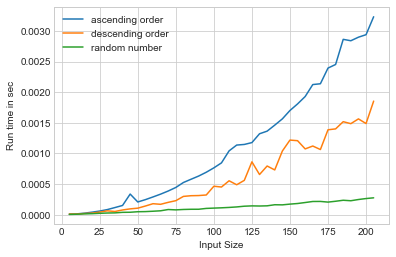

<Figure size 432x288 with 0 Axes>

In [46]:
plt.xlabel('Input Size')
plt.ylabel('Run time in sec')
fig = plt.gcf()
plt.plot(length_array,total_asc_quick_time);
plt.plot(length_array,total_des_quick_time)
plt.plot(length_array,total_ran_quick_time)
plt.legend(['ascending order','descending order','random number'], loc='upper left')
plt.show()
plt.draw()
fig.savefig('Quick_Sort.png',dpi = 200)

# MERGE SORT GRAPH

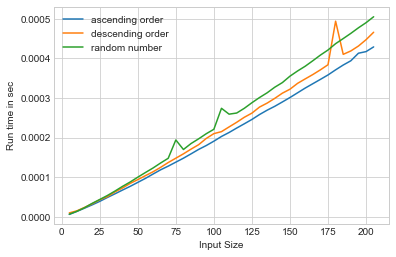

<Figure size 432x288 with 0 Axes>

In [47]:
plt.xlabel('Input Size')
plt.ylabel('Run time in sec')
fig = plt.gcf()
plt.plot(length_array,total_asc_merge_time);
plt.plot(length_array,total_des_merge_time)
plt.plot(length_array,total_ran_merge_time)
plt.legend(['ascending order','descending order','random number'], loc='upper left')
plt.show()
plt.draw()
fig.savefig('Merge_Sort.png',dpi = 200)

# INSERTION SORT GRAPH

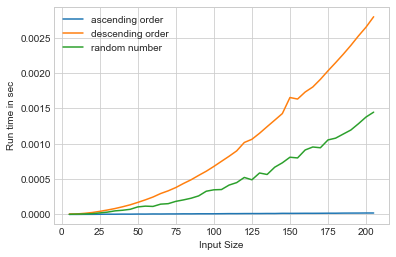

In [48]:
plt.xlabel('Input Size')
plt.ylabel('Run time in sec')
fig = plt.gcf()
plt.plot(length_array,total_asc_insertion_time)
plt.plot(length_array,total_des_insertion_time)
plt.plot(length_array,total_ran_insertion_time)
plt.legend(['ascending order','descending order','random number'], loc='upper left')
plt.show()
# plt.draw()
fig.savefig('insertionSort.png',dpi = 200)

# HEAP SORT GRAPH

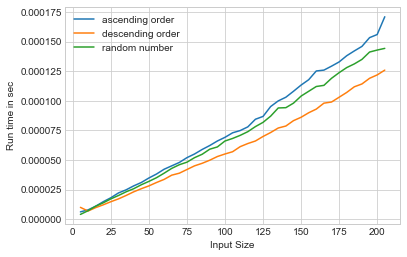

<Figure size 432x288 with 0 Axes>

In [49]:
plt.xlabel('Input Size')
plt.ylabel('Run time in sec')
fig = plt.gcf()
plt.plot(length_array,total_asc_heap_time)
plt.plot(length_array,total_des_heap_time)
plt.plot(length_array,total_ran_heap_time)
plt.legend(['ascending order','descending order','random number'], loc='upper left')
plt.show()
plt.draw()
fig.savefig('heap_graph.png',dpi = 200)

# BUBBLE SORT GRAPH

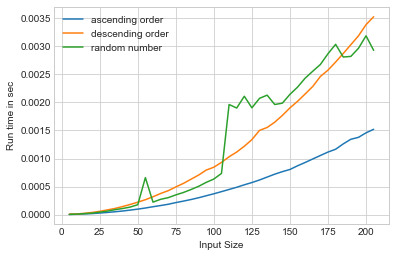

<Figure size 432x288 with 0 Axes>

In [50]:
plt.xlabel('Input Size')
plt.ylabel('Run time in sec')
fig = plt.gcf()
plt.plot(length_array,total_asc_bubble_time)
plt.plot(length_array,total_des_bubble_time)
plt.plot(length_array,total_ran_bubble_time)
plt.legend(['ascending order','descending order','random number'], loc='upper left')
plt.show()
plt.draw()
fig.savefig('bubbleSort_graph.png',dpi = 200)

# comparison between algorithm

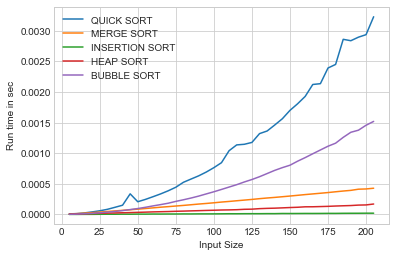

<Figure size 432x288 with 0 Axes>

In [51]:
plt.xlabel('Input Size')
plt.ylabel('Run time in sec')
fig = plt.gcf()
plt.plot(length_array,total_asc_quick_time)
plt.plot(length_array,total_asc_merge_time)
plt.plot(length_array,total_asc_insertion_time)
plt.plot(length_array,total_asc_heap_time);
plt.plot(length_array,total_asc_bubble_time);
plt.legend(['QUICK SORT','MERGE SORT','INSERTION SORT','HEAP SORT','BUBBLE SORT'], loc='upper left')
plt.show()
plt.draw()
fig.savefig('ASCENDING_GRAPH.png',dpi = 200)

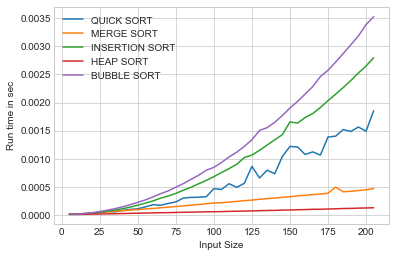

<Figure size 432x288 with 0 Axes>

In [52]:
plt.xlabel('Input Size')
plt.ylabel('Run time in sec')
fig = plt.gcf()
plt.plot(length_array,total_des_quick_time)
plt.plot(length_array,total_des_merge_time)
plt.plot(length_array,total_des_insertion_time)
plt.plot(length_array,total_des_heap_time)
plt.plot(length_array,total_des_bubble_time)
plt.legend(['QUICK SORT','MERGE SORT','INSERTION SORT','HEAP SORT','BUBBLE SORT'], loc='upper left')
plt.show()
plt.draw()
fig.savefig('DESCENDING_GRAPH.png',dpi = 200)

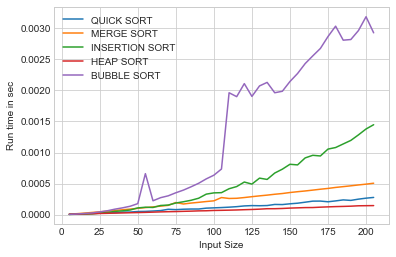

<Figure size 432x288 with 0 Axes>

In [53]:
plt.xlabel('Input Size')
plt.ylabel('Run time in sec')
fig = plt.gcf()
plt.plot(length_array,total_ran_quick_time)
plt.plot(length_array,total_ran_merge_time)
plt.plot(length_array,total_ran_insertion_time)
plt.plot(length_array,total_ran_heap_time)
plt.plot(length_array,total_ran_bubble_time)
plt.legend(['QUICK SORT','MERGE SORT','INSERTION SORT','HEAP SORT','BUBBLE SORT'], loc='upper left')
plt.show()
plt.draw()
fig.savefig('RANDOM_GRAPH.png',dpi = 200)